In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt


def gammaCorrection(gamma):
    linear = cv2.imread(os.path.join('/content/1.jpeg'), 0)
    height = len(linear)
    width = len(linear[0])
    gamma_image = np.zeros((height, width))
    gamma_corrected_image = np.zeros((height, width))

    inv_gamma = 1 / gamma
    for i in range(height):
        for j in range(width):
            gamma_image[i][j] = 255 * ((linear[i][j] / 255) ** gamma)
            gamma_corrected_image[i][j] = 255 * ((linear[i][j] / 255) ** inv_gamma)
    cv2.imwrite('gamma_correction.jpeg', gamma_corrected_image) #Perubahan gambar tergantung nilai gama
    # apabila nilainya > 1 maka gambarnya terlihat cerah
    # apabila nilainya < 1 maka gambarnya terlihat gelap
    cv2.imwrite('gamma_image.png', gamma_image) # Perubahan Gambar

def gammaImage():
    height = 900
    width = 1600
    checkerboard = np.ones((height, width)) * 255
    k = 0
    for i in range(0, height, 2):
        for j in range(0, width, 4):
            checkerboard[i][j + k] = 0
            checkerboard[i + 1][j + k] = 0
            checkerboard[i][j + k + 1] = 0
            checkerboard[i + 1][j + k + 1] = 0
        if k == 0:
            k = 2
        else:
            k = 0

    cv2.imwrite('checkerboard.png', checkerboard)
    Ic = (255 + 0) / 2

    g = 138
    gamma = 2.0
    uniform_gray = np.ones((height, width)) * g
    cv2.imwrite('uniform_gray.png', uniform_gray)

    interlaced = np.array(checkerboard)
    for i in range(0, height, 32):
        for j in range(0, width):
            for k in range(16):
                if i + k >= height:
                    break
                interlaced[i + k][j] = g
    Ig = 255 * ((g / 255) ** gamma)
    cv2.imwrite('interlaced.png', interlaced)
    return gamma
    #g = 138
    #gamma = 1.13
    #Ic = Ig = 127.5

if __name__ == '__main__':
    gammaCorrection(gammaImage())

In [ ]:
img_gamma = cv2.imread('/content/gamma_correction.jpeg', 1)

In [ ]:
img_new = cv2.imread('/content/1.jpeg', 1)

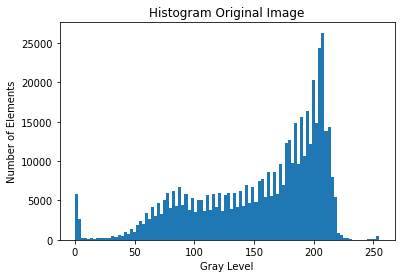

In [ ]:
plt.hist(img_new.flat, bins=100, range=(0, 255))
plt.savefig('Original image.jpeg')
plt.xlabel('Gray Level')
plt.ylabel('Number of Elements')
plt.title('Histogram Original Image')
plt.savefig('Histogram gamma correction.JPEG');

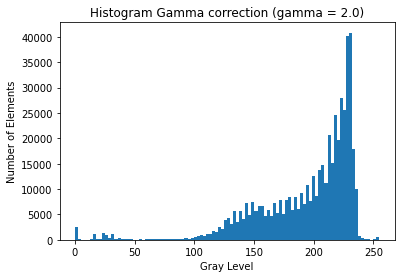

In [ ]:
plt.hist(img_gamma.flat, bins=100, range=(0, 255))
plt.xlabel('Gray Level')
plt.ylabel('Number of Elements')
plt.title('Histogram Gamma correction (gamma = 2.0)')
plt.savefig('Histogram gamma correction (gamma = 2.0).JPEG');

In [ ]:
from math import log10, sqrt

def PSNR(original, compressed):
	mse = np.mean((original - compressed) ** 2)
	if(mse == 0): # MSE is zero means no noise is present in the signal .
				# Therefore PSNR have no importance.
		return 100
	max_pixel = 255.0
	psnr = 20 * log10(max_pixel / sqrt(mse))
	return psnr

def main():
	original = cv2.imread("/content/BACTERIA-104960-0001 (20).jpeg")
	compressed = cv2.imread("/content/gamma_correction.jpeg", 1)
	value = PSNR(original, compressed)
	print(f"PSNR value is {value} dB")
	
if __name__ == "__main__":
	main()


original = cv2.imread("/content/BACTERIA-104960-0001 (20).jpeg")
compressed = cv2.imread("/content/gamma_correction.jpeg", 1)
mse = np.mean((original - compressed) ** 2)
print(f"MSE value is {mse} dB")

In [ ]:
from skimage.metrics import structural_similarity

#Works well with images of different dimensions
def orb_sim(img1, img2):
  # SIFT is no longer available in cv2 so using ORB
  orb = cv2.ORB_create()

  # detect keypoints and descriptors
  kp_a, desc_a = orb.detectAndCompute(img1, None)
  kp_b, desc_b = orb.detectAndCompute(img2, None)

  # define the bruteforce matcher object
  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    
  #perform matches. 
  matches = bf.match(desc_a, desc_b)
  #Look for similar regions with distance < 50. Goes from 0 to 100 so pick a number between.
  similar_regions = [i for i in matches if i.distance < 50]  
  if len(matches) == 0:
    return 0
  return len(similar_regions) / len(matches)


#Needs images to be same dimensions
def structural_sim(img1, img2):

  sim, diff = structural_similarity(img1, img2, full=True)
  return sim

# img00 = cv2.imread('images/monkey_distorted.jpg', 0)
# img01 = cv2.imread('images/monkey_rotated.jpg', 0)

img1 = cv2.imread('/content/gamma_correction.jpeg', 0)  # 714 x 901 pixels
img2 = cv2.imread('/content/BACTERIA-104960-0001 (20).jpeg', 0)  # 714 x 901 pixels
# img3 = cv2.imread('images/BSE_smoothed.jpg', 0)  # 203 x 256 pixels
# img4 = cv2.imread('images/different_img.jpg', 0)  # 203 x 256 pixels

# orb_similarity = orb_sim(img1, img2)  #1.0 means identical. Lower = not similar

# print("Similarity using ORB is: ", orb_similarity)
#Resize for SSIM
# from skimage.transform import resize
# img5 = resize(img3, (img1.shape[0], img1.shape[1]), anti_aliasing=True, preserve_range=True)

ssim = structural_sim(img1, img2) #1.0 means identical. Lower = not similar
print("Similarity using SSIM is: ", ssim)

In [ ]:
pip install sewar

In [ ]:
from sewar.full_ref import rmse

In [ ]:
print("RMSE", rmse(img2,img1))